In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("winemag-data-130k-v2.csv")

In [7]:
df =df.drop(["Unnamed: 0"],axis =1)

In [9]:
df_us = df_us.drop(['country','taster_twitter_handle','region_2'],axis = 1).dropna()

In [8]:
df_us = df[df['country']=="US"]

In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
from textblob import TextBlob

In [12]:
def senti(x):
    return TextBlob(x).sentiment[0] 

In [13]:
from nltk.stem import WordNetLemmatizer 
df_us['description'] = df_us['description'].apply(lambda x: " ".join(x.lower() for x in x.split()))
st = WordNetLemmatizer()
df_us['description'] = df_us['description'].apply(lambda x: " ".join([st.lemmatize(word) for word in x.split()]))


In [14]:
df_us['sentiment'] = df_us['description'].apply(senti)

In [15]:
df_us.drop('description',axis=1,inplace=True)

In [16]:
df_us.price.describe()

count    25888.000000
mean        39.949204
std         28.259815
min          4.000000
25%         24.000000
50%         35.000000
75%         50.000000
max       2013.000000
Name: price, dtype: float64

In [45]:
bins = [3, 10,15,20, 25, 50, 100,200,2013]
labels = [1,2,3,4,5,6,7,8]
df_us['price'] = pd.cut(df_us['price'], bins=bins, labels=labels)

In [ ]:
bins = [-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1]
labels = [1,2,3,4,5,6,7,8]
df_us['sentiment'] = pd.cut(df_us['sentiment'], bins=bins, labels=labels)

In [44]:
df_us.isnull().values.any()

False

In [42]:
df_us[df_us['price_bin'].isnull()]

,designation,points,price,province,region_1,taster_name,title,variety,winery,sentiment,price_bin
59507,Unoaked,83,4.0,California,California,Jim Gordon,Pam's Cuties NV Unoaked Chardonnay (California),Chardonnay,Pam's Cuties,0.17,NaN


In [ ]:
df_us.sentiment= df_us.sentiment.astype(object)
df_us.price= df_us.price.astype(object)

In [102]:
import matplotlib

matplotlib.rc('figure', figsize=(10, 5))

Feature 0: 2391.696414
Feature 1: 32828.165412
Feature 2: 2338.653609


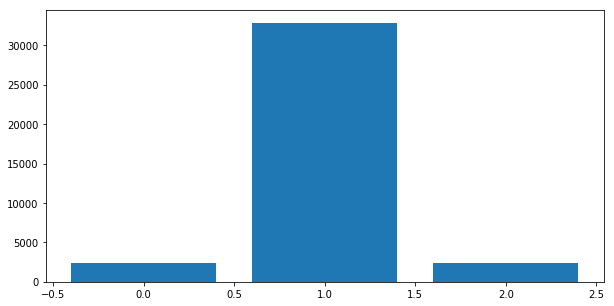

In [151]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot
import numpy as np
from sklearn.preprocessing import MinMaxScaler
 
# load the dataset
def load_dataset(filename):
	# load the dataset as a pandas DataFrame
	data = read_csv(filename, header=None)
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	X = dataset[:, :-1]
	y = dataset[:,-1]
	# format all fields as string
	X = X.astype(str)
	return X, y
 
# prepare input data
def prepare_inputs(X):
    oe = OrdinalEncoder()
    oe.fit(X)
    return oe.transform(X),oe
 

def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# load the dataset
y = df_us['points']
X = df_us.drop(['points','price_bin'],axis=1)
X= X[['price','designation','variety']]
X_vect,oe = prepare_inputs(X)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.10, random_state=1)
# prepare input data
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [127]:
df_us.columns

Index(['designation', 'points', 'price', 'province', 'region_1', 'taster_name',
       'title', 'variety', 'winery', 'sentiment', 'price_bin'],
      dtype='object')

Feature 0: 32828.165412
Feature 1: 2391.696414
Feature 2: 5016.032856
Feature 3: 10554.756620
Feature 4: 892.499951
Feature 5: 163667.032153
Feature 6: 2338.653609
Feature 7: 21602.901404
Feature 8: 498514.550169


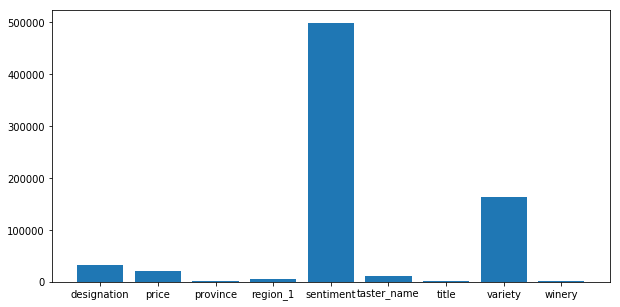

In [129]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot
import numpy as np
from sklearn.preprocessing import MinMaxScaler
 
# load the dataset
def load_dataset(filename):
	# load the dataset as a pandas DataFrame
	data = read_csv(filename, header=None)
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	X = dataset[:, :-1]
	y = dataset[:,-1]
	# format all fields as string
	X = X.astype(str)
	return X, y
 
# prepare input data
def prepare_inputs(X):
    oe = OrdinalEncoder()
    oe.fit(X)
    return oe.transform(X),oe
 

def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# load the dataset
y = df_us['points']
X = df_us.drop(['points','price_bin'],axis=1)
X_vect,oe = prepare_inputs(X)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.10, random_state=1)
# prepare input data
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar(['designation', 'province', 'region_1', 'taster_name',
       'title', 'variety', 'winery','price', 'sentiment'], fs.scores_)
pyplot.show()

In [141]:
fs.pvalues_

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       3.10003759e-176, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000])

In [106]:
help(LinearRegression())

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, optional, default True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, optional, default False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean and dividing by the l2-norm.
 |      If you wish to standardize, please

In [152]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
clf = LinearRegression()
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
np.sqrt(metrics.mean_squared_error(clf.predict(X_test),y_test))

2.541988893862359

In [146]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
clf = LinearRegression()
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
np.sqrt(metrics.mean_squared_error(clf.predict(X_test),y_test))

2.4928837674218483

In [143]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(clf.predict(X_test),y_test))

2.4885636793216106

In [47]:
df_us = df[df['country']=="US"]

,designation,points,price,province,region_1,taster_name,title,variety,winery,sentiment,price_bin
3,Reserve Late Harvest,87,2,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,0.166667,2
4,Vintner's Reserve Wild Child Block,87,6,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,0.306667,6
10,Mountain Cuvée,87,3,California,Napa Valley,Virginie Boone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,0.358333,3
20,Vin de Maison,87,4,Virginia,Virginia,Alexander Peartree,Quiévremont 2012 Vin de Maison Red (Virginia),Red Blend,Quiévremont,-0.179167,4
23,Signature Selection,87,4,California,Paso Robles,Matt Kettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi,-0.040278,4
...,...,...,...,...,...,...,...,...,...,...,...
129919,Reserve,91,7,Washington,Walla Walla Valley (WA),Paul Gregutt,Nicholas Cole Cellars 2004 Reserve Red (Walla ...,Red Blend,Nicholas Cole Cellars,0.093194,7
129926,Ash Hollow Vineyard,91,5,Washington,Walla Walla Valley (WA),Paul Gregutt,Reininger 2005 Ash Hollow Vineyard Syrah (Wall...,Syrah,Reininger,0.153571,5
129945,Jurassic Park Vineyard Old Vines,90,3,California,Santa Ynez Valley,Matt Kettmann,Birichino 2013 Jurassic Park Vineyard Old Vine...,Chenin Blanc,Birichino,0.145833,3
129949,Barrel Fermented,90,5,California,Napa Valley,Virginie Boone,Flora Springs 2013 Barrel Fermented Chardonnay...,Chardonnay,Flora Springs,0.207143,5


In [99]:
df_us.columns

Index(['designation', 'points', 'price', 'province', 'region_1', 'taster_name',
       'title', 'variety', 'winery', 'sentiment', 'price_bin'],
      dtype='object')

In [98]:
df_us

,designation,points,price,province,region_1,taster_name,title,variety,winery,sentiment,price_bin
3,Reserve Late Harvest,87,2,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,0.166667,2
4,Vintner's Reserve Wild Child Block,87,6,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,0.306667,6
10,Mountain Cuvée,87,3,California,Napa Valley,Virginie Boone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,0.358333,3
20,Vin de Maison,87,4,Virginia,Virginia,Alexander Peartree,Quiévremont 2012 Vin de Maison Red (Virginia),Red Blend,Quiévremont,-0.179167,4
23,Signature Selection,87,4,California,Paso Robles,Matt Kettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi,-0.040278,4
...,...,...,...,...,...,...,...,...,...,...,...
129919,Reserve,91,7,Washington,Walla Walla Valley (WA),Paul Gregutt,Nicholas Cole Cellars 2004 Reserve Red (Walla ...,Red Blend,Nicholas Cole Cellars,0.093194,7
129926,Ash Hollow Vineyard,91,5,Washington,Walla Walla Valley (WA),Paul Gregutt,Reininger 2005 Ash Hollow Vineyard Syrah (Wall...,Syrah,Reininger,0.153571,5
129945,Jurassic Park Vineyard Old Vines,90,3,California,Santa Ynez Valley,Matt Kettmann,Birichino 2013 Jurassic Park Vineyard Old Vine...,Chenin Blanc,Birichino,0.145833,3
129949,Barrel Fermented,90,5,California,Napa Valley,Virginie Boone,Flora Springs 2013 Barrel Fermented Chardonnay...,Chardonnay,Flora Springs,0.207143,5


TypeError: chi2() missing 2 required positional arguments: 'X' and 'y'

In [48]:
df[df['country']=="US"]['points'].unique()

array([ 87,  86,  85,  88,  92,  91,  90,  89,  82,  96,  95,  93,  94,
        84,  83,  99,  98,  97,  81,  80, 100], dtype=int64)

In [51]:
!pip install wordcloud

You are using pip version 18.0, however version 20.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [57]:
!pip install catboost

You are using pip version 18.0, however version 20.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [174]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [176]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import string
from wordcloud import WordCloud, STOPWORDS
import re
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from catboost import Pool, CatBoostRegressor, cv

def process(data):
    data['description']= data['description'].str.lower()
    data['description']= data['description'].apply(lambda elem: re.sub('[^a-zA-Z]',' ', elem))  
    tokenizer = RegexpTokenizer(r'\w+')
    words_descriptions = data['description'].apply(tokenizer.tokenize)
    stopword_list = stopwords.words('english')
    ps = PorterStemmer()
    words_descriptions = words_descriptions.apply(lambda elem: [word for word in elem if not word in stopword_list])
    words_descriptions = words_descriptions.apply(lambda elem: [st.lemmatize(word) for word in elem])
    data['description_cleaned'] = words_descriptions.apply(lambda elem: ' '.join(elem))
    return data


def prepare_dataframe(vect, data, features=True):
    vectorized=vect.fit_transform(data['description_cleaned']).toarray()
    vectorized=pd.DataFrame(vectorized)
    if features == True:
        X=data.drop(columns=['points','description','description_cleaned'])
        X=X.fillna(-1)
        print(X.columns)
        X=pd.concat([X.reset_index(drop=True),vectorized.reset_index(drop=True)],axis=1)
        categorical_features_indices =[0,2,3,4,5,6,7]
    else:
        X=vectorized
        categorical_features_indices =[]
    y=data['points']
    return X,y,categorical_features_indices,vect

#model definintion and training.
def perform_model(X_train, y_train,X_valid, y_valid,X_test, y_test,categorical_features_indices,vect,name):
    model = CatBoostRegressor(
        random_seed = 100,
        loss_function = 'RMSE',
        iterations=800,
    )
    
    model.fit(
        X_train, y_train,
        cat_features = categorical_features_indices,
        verbose=False,
        eval_set=(X_valid, y_valid)
    )
    
    print(name+" technique RMSE on training data: "+ model.score(X_train, y_train).astype(str))
    print(name+" technique RMSE on test data: "+ model.score(X_test, y_test).astype(str))
    return model
    
def prepare_variable(vect, data, features_append=True):
    X, y , categorical_features_indices,vect = prepare_dataframe(vect, data,features_append)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, 
                                                        random_state=42)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, 
                                                        random_state=52)
    return X_train, y_train,X_valid, y_valid,X_test, y_test, categorical_features_indices,vect
vect= TfidfVectorizer(analyzer='word', token_pattern=r'\w+',max_features=1000)
data = process(df_train)
data=data.drop_duplicates(['description','title'])
data=data.reset_index(drop=True)
data['price'] = data['price'].astype(int)
training_variable=prepare_variable(vect, data)
model = perform_model(*training_variable, 'TF-IDF')

Index(['designation', 'price', 'province', 'region_1', 'taster_name', 'title',
       'variety', 'winery'],
      dtype='object')
TF-IDF technique RMSE on training data: 0.7467481511294061
TF-IDF technique RMSE on test data: 0.5936612922871167


In [223]:
top_features = np.argsort(model.get_feature_importance())[-100:]
top_features

array([565, 286, 804, 991, 623, 441, 465,  63, 813, 133, 671, 461, 739,
       875, 533, 153, 717, 630, 354, 881, 808, 532,  26, 531,  81,  68,
       277, 358, 850, 656, 734,  50, 144, 902, 301, 857, 814, 195, 775,
       526, 248, 594, 888, 763, 869,  58, 335,  48, 591, 236, 767, 353,
        36, 267, 555, 349, 979, 807,  79, 303, 117, 205, 398, 953,  99,
       482, 463, 670, 539, 861, 190, 880, 232, 840, 381, 859, 965, 518,
         0, 847,  54, 592,  33, 262, 423,  34, 889, 334, 818, 310, 506,
       109,   2, 901,  10,   3,   6,   4,   1,   7], dtype=int64)

In [177]:
vect = training_variable[-1]

In [225]:
feature_names_1 = []

for i in range(100):
    if i-8 >=0:
        feature_names_1.append(vect.get_feature_names()[top_features[i]-8])

In [226]:
feature_names_1

['tar and',
 'and fresh',
 'on this',
 'high toned',
 'rich and',
 'the way',
 'light in',
 'and length',
 'power and',
 'of it',
 'dense and',
 'thick and',
 'tannin and',
 'light bodied',
 'a great',
 'light and',
 'and a',
 'acidity and',
 'blend of',
 'doesn t',
 'the fruit',
 'of this',
 'red wine',
 'a soft',
 'and herbal',
 'through a',
 'but it',
 'the mouth',
 'tart and',
 'and sour',
 'smoked meat',
 'length and',
 'balanced and',
 'oak and',
 'this ha',
 'seem to',
 'the tannin',
 'a touch',
 'complexity and',
 'a slightly',
 'now but',
 'aroma of',
 'show on',
 'deep and',
 'a lovely',
 'black pepper',
 'medium bodied',
 'dark chocolate',
 'with a',
 'tannic and',
 'an earthy',
 'but the',
 'and delicious',
 'and tannic',
 'flavor of',
 'white pepper',
 'and cassis',
 'in the',
 'hint of',
 'on the',
 'lingering finish',
 'the palate',
 'and slightly',
 'there s',
 'aroma and',
 'the best',
 'fine grained',
 'the nose',
 'wine is',
 'layer of',
 'with sweet',
 'the finish',

In [187]:
vect.get_feature_names()[310-8]

'cabernet sauvignon'

In [160]:
model.feature_names_[7]

'winery'

In [69]:
training_variable[0]

,designation,price,province,region_1,taster_name,title,variety,winery,0,1,...,490,491,492,493,494,495,496,497,498,499
17334,Monte Rosso Vineyard,85,California,Sonoma Valley,Virginie Boone,Louis M. Martini 2011 Monte Rosso Vineyard Cab...,Cabernet Sauvignon,Louis M. Martini,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000
19355,C Blend,52,California,Napa Valley,Virginie Boone,Paraduxx 2011 C Blend Red (Napa Valley),Red Blend,Paraduxx,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.28993
17766,Del Rio,22,Oregon,Rogue Valley,Michael Schachner,Elk Cove 2001 Del Rio Viognier (Rogue Valley),Viognier,Elk Cove,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.212224,0.0,0.000000,0.0,0.0,0.00000
16577,Spilya Vineyard,30,Washington,Yakima Valley,Sean P. Sullivan,Lobo Hills 2013 Spilya Vineyard Syrah (Yakima ...,Syrah,Lobo Hills,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000
3636,Legacy 1868,45,California,Amador County,Jim Gordon,Jessie's Grove 2008 Legacy 1868 Red (Amador Co...,Red Blend,Jessie's Grove,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4570,Estate,22,California,Sierra Foothills,Jim Gordon,Naggiar 2012 Estate Sangiovese (Sierra Foothills),Sangiovese,Naggiar,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000
19172,Stoneridge Vineyard,45,Washington,Columbia Valley (WA),Sean P. Sullivan,K Vintners 2012 Stoneridge Vineyard Cabernet S...,Cabernet Sauvignon,K Vintners,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000
16503,Vintner's Selection,17,Ohio,Grand River Valley,Susan Kostrzewa,Debonné 2007 Vintner's Selection Chardonnay (G...,Chardonnay,Debonné,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.315849,0.0,0.0,0.00000
17066,Estate,30,Oregon,Umpqua Valley,Sean P. Sullivan,Abacela 2009 Estate Syrah (Umpqua Valley),Syrah,Abacela,0.0,0.231175,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000


In [67]:
training_variable[6]

[0, 1, 3, 4, 5, 6, 7]

In [213]:
bins = [79,86,89,90,100]
labels = ["below average","average","good","best"]
df_us['points_tag'] = pd.cut(df_us['points'], bins=bins, labels=labels)

In [218]:
df_us[df_us.points>90]

,designation,points,price,province,region_1,taster_name,title,variety,winery,sentiment,price_bin,points_tag
144,K Block,91,6,California,Spring Mountain District,Virginie Boone,Terra Valentine 2013 K Block Cabernet Sauvigno...,Cabernet Sauvignon,Terra Valentine,-0.080000,6,best
145,Guidotti Vineyard,91,6,California,Santa Lucia Highlands,Matt Kettmann,Testarossa 2013 Guidotti Vineyard Pinot Noir (...,Pinot Noir,Testarossa,-0.150000,6,best
146,Family Reserve,91,6,California,Santa Ynez Valley,Matt Kettmann,Vincent Vineyards 2010 Family Reserve Cabernet...,Cabernet Sauvignon,Vincent Vineyards,0.070000,6,best
147,Family Reserve,91,6,California,Santa Ynez Valley,Matt Kettmann,Vincent Vineyards 2012 Family Reserve Cabernet...,Cabernet Sauvignon,Vincent Vineyards,0.237500,6,best
149,Destruction Level,91,5,California,Monterey,Matt Kettmann,Wrath 2013 Destruction Level Red (Monterey),Rhône-style Red Blend,Wrath,0.144444,5,best
...,...,...,...,...,...,...,...,...,...,...,...,...
129912,Durell Vineyard,91,6,California,Sonoma Coast,Virginie Boone,Dunstan 2014 Durell Vineyard Pinot Noir (Sonom...,Pinot Noir,Dunstan,0.300000,6,best
129913,Artist Series #14,92,5,Washington,Columbia Valley (WA),Paul Gregutt,Woodward Canyon 2005 Artist Series #14 Caberne...,Cabernet Sauvignon,Woodward Canyon,0.300476,5,best
129915,Mith Red Wine,91,5,Washington,Columbia Valley (WA),Paul Gregutt,Balboa 2005 Mith Red Wine Red (Columbia Valley...,Red Blend,Balboa,0.303704,5,best
129919,Reserve,91,7,Washington,Walla Walla Valley (WA),Paul Gregutt,Nicholas Cole Cellars 2004 Reserve Red (Walla ...,Red Blend,Nicholas Cole Cellars,0.093194,7,best


In [207]:
y.unique()

[good, not good]
Categories (2, object): [not good < good]

In [229]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics
df_train = df[df['country']=="US"]
df_train = df_train.drop(['country','taster_twitter_handle','region_2'],axis = 1).dropna()
bins = [79,86,89,90,100]
labels = ["below average","average","good","best"]
df_train['points_tag'] = pd.cut(df_train['points'], bins=bins, labels=labels)
y= df_train['points_tag']
target_names = y.unique()
X= process(df_train)['description_cleaned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)
feature_names = []
def vectorize(vect,X_train,X_test,chisquare=False,n_features=10000):
    if vect == "hashing":
        vectorizer = HashingVectorizer(stop_words='english', alternate_sign=False,
                                       n_features=2 ** 16)
        X_train = vectorizer.transform(X_train)
    else:
        vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
                                     stop_words='english',ngram_range=(2,2))
        X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)
    if vect == "hashing" :
        feature_names = None
    else:
        feature_names = vectorizer.get_feature_names()
    if chisquare:
        ch2 = SelectKBest(chi2, k=n_features)
        X_train = ch2.fit_transform(X_train, y_train)
        X_test = ch2.transform(X_test)
        if feature_names:
            # keep selected feature names
            feature_names = [feature_names[i] for i
                             in ch2.get_support(indices=True)]
        print("selected features using chi2")
    if feature_names:
        feature_names = np.asarray(feature_names)
        return X_train,X_test,feature_names
    return X_train,X_test
def benchmark(clf,print_top10 = True,print_report = False):
    print("Training: ")
    print(clf)
    clf.fit(X_train, y_train)
    print("trained model")
    pred = clf.predict(X_test)
    print("predicted using model")

    score = metrics.accuracy_score(y_test, pred)
    print("accuracy:   %0.3f" % score)

    if hasattr(clf, 'coef_'):
        print("dimensionality: %d" % clf.coef_.shape[1])
        print("density: %f" % density(clf.coef_))

        if print_top10 and feature_names is not None:
            print("top 10 keywords per class:")
            for i, label in enumerate(target_names):
                top10 = np.argsort(clf.coef_[i])[-10:]
                print("%s: %s" % (label, " , ".join(feature_names[top10])))
        print()

    if print_report:
        print("classification report:")
        print(metrics.classification_report(y_test, pred,
                                            target_names=target_names))
    clf_descr = str(clf).split('(')[0]
    return clf_descr, score
X_train,X_test,feature_names = vectorize("tfidf",X_train,X_test,chisquare=False)
results = []
for clf, name in (
        (RidgeClassifier(tol=1e-2, solver="sag"), "Ridge Classifier"),
        (Perceptron(max_iter=100), "Perceptron"),
        (PassiveAggressiveClassifier(max_iter=100),
         "Passive-Aggressive"),
        (KNeighborsClassifier(n_neighbors=10), "kNN"),
        (LogisticRegression(n_jobs=1,C=1e5,max_iter=100),"lr"),
        (RandomForestClassifier(), "Random forest")):
    print('=' * 80)
    print(name)
    results.append(benchmark(clf))

Ridge Classifier
Training: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None, solver='sag',
                tol=0.01)


C:\Users\Aman\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:557: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '


trained model
predicted using model
accuracy:   0.632
dimensionality: 220612
density: 1.000000
top 10 keywords per class:
average: quite dry , fruit touch , flavor light , moderate acidity , wine bodied , dry riesling , delivers enjoyment , make good , moderately long , grainy tannin
below average: strong aroma , palate bit , short finish , bitter tannin , volatile aroma , simple straightforward , medium sweet , soft texture , light bodied , pressed apple
best: long finish , beautifully balanced , beautiful wine , star anise , white pepper , sea salt , smoked meat , lengthy finish , bay leaf , delicious wine
good: rich wine , silky polished , juicy core , creamy finish , dense tannin , corn silk , warm vintage , nicely balanced , doesn hold , currant cranberry

Perceptron
Training: 
Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=100, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=Tru

C:\Users\Aman\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


trained model
predicted using model
accuracy:   0.627
dimensionality: 220612
density: 1.000000
top 10 keywords per class:
average: nose bottling , bodied fruit , moderate acidity , delivers enjoyment , fruit touch , drink dry , dry riesling , moderately long , grainy tannin , easy drinking
below average: flavor concentration , medium sweet , red blend , short finish , drink dry , medium bodied , soft texture , light bodied , easy drinking , pressed apple
best: lingering finish , fine grained , star anise , sea salt , white pepper , long finish , delicious wine , lengthy finish , bay leaf , smoked meat
good: dark chocolate , wet stone , currant cranberry , meyer lemon , sense balance , lovely sense , nicely balanced , vineyard designate , lengthy finish , black cherry

Random forest
Training: 
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, m

In [ ]:
X

In [ ]:
X.columns.to_list()

In [ ]:
df_new = pd.DataFrame(X_new,columns=['designation',
 'province',
 'region_1',
 'taster_name',
 'title',
 'variety',
 'winery','price','sentiment'])

In [ ]:
X_1

In [ ]:
import statsmodels.api as sm
X_1 = sm.add_constant(np.array(df_new))
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

In [ ]:
df_us['points'].apply(lambda x: np.log(x))

In [ ]:
X_new[1][8]

In [ ]:

import numpy as geek 

# input array 
in_arr1 = geek.array([ 1, 2, 3] ) 
print ("1st Input array : \n", in_arr1) 

in_arr2 = geek.array([[ 4]] ) 
print ("2nd Input array : \n", in_arr2) 

# Stacking the two arrays 
out_arr = geek.column_stack((in_arr1, 2,1)) 
print ("Output stacked array :\n ", out_arr) 


In [ ]:
import numpy as np
np.concatenate([X,[np.array(price)]],axis=1)

In [ ]:
oe.inverse_transform([X_train[0]])

In [ ]:
df.dtypes

In [ ]:
df[(df['country'] == "South Africa") & (df['variety'].str.contains("Sauvignon Blanc",na = False)) &(df['price']==15)][["country","variety","points"]]

In [ ]:
df[(df['country'] == "Chile") & (df['variety'].str.contains("Chardonnay",na = False)) & (df['price']==15)][["country","variety","points"]]

In [ ]:
import numpy as np
from pylab import plt

def dnorm(x, mu, sig):
    return 1/(sig * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sig**2))

def dexp(x, l):
    return l * np.exp(- l*x)

def like(parameters):
    [mu1, sig1, mu2, sig2] = parameters
    return dnorm(sample1, mu1, sig1).prod()*dnorm(sample2, mu2, sig2).prod()

def prior(parameters):
    [mu1, sig1, mu2, sig2] = parameters
    return dnorm(mu1, pooled.mean(), 1000*pooled.std()) * dnorm(mu2, pooled.mean(), 1000*pooled.std()) * dexp(sig1, 0.1) * dexp(sig2, 0.1)

def posterior(parameters):
    [mu1, sig1, mu2, sig2] = parameters
    return like([mu1, sig1, mu2, sig2])*prior([mu1, sig1, mu2, sig2])


#create samples
sample1 = df[(df['country'] == "South Africa") & (df['variety'].str.contains("Sauvignon Blanc",na = False)) &(df['price']==15)]["points"]
sample2 = df[(df['country'] == "Chile") & (df['variety'].str.contains("Chardonnay",na = False)) & (df['price']==15)]["points"]

pooled= np.append(sample1, sample2)

plt.figure(0)
plt.hist(sample1)
plt.hold(True)
plt.hist(sample2)
plt.show(block=False)

mu1 = 100 
sig1 = 10
mu2 = 100
sig2 = 10
parameters = np.array([mu1, sig1, mu2, sig2])

niter = 10000

results = np.zeros([niter, 4])
results[1,:] = parameters

for iteration in np.arange(2,niter):
    candidate = parameters + np.random.normal(0,0.5,4)
    ratio = posterior(candidate)/posterior(parameters)
    if np.random.uniform() < ratio:
        parameters = candidate
    results[iteration,:] = parameters

#burn-in
results = results[499:niter-1,:]

mu1 = results[:,1]
mu2 = results[:,3]

d = (mu1 - mu2)
p_value = np.mean(d > 0)

plt.figure(1)
plt.hist(d,normed = 1)
plt.show()

In [ ]:
np.mean(mu2- mu1 >0)

In [ ]:
df2 = df[(df['country'] =="Italy") & (df['price'] < 20) ].groupby("region_1").filter(lambda x: len(x) > 4)

In [ ]:
df2

In [ ]:
df2.points.mean()

In [ ]:
import numpy as np
df3 = df2.groupby("region_1").agg({"points":np.mean}).sort_values('points')

In [ ]:
df3

In [ ]:
fit_thin <- fit[2*(1:5000),]
fit.mcmc <- as.mcmc(fit_thin)
plot(fit.mcmc)
acf(fit.mcmc)
raftery.diag(as.mcmc(fit_thin))

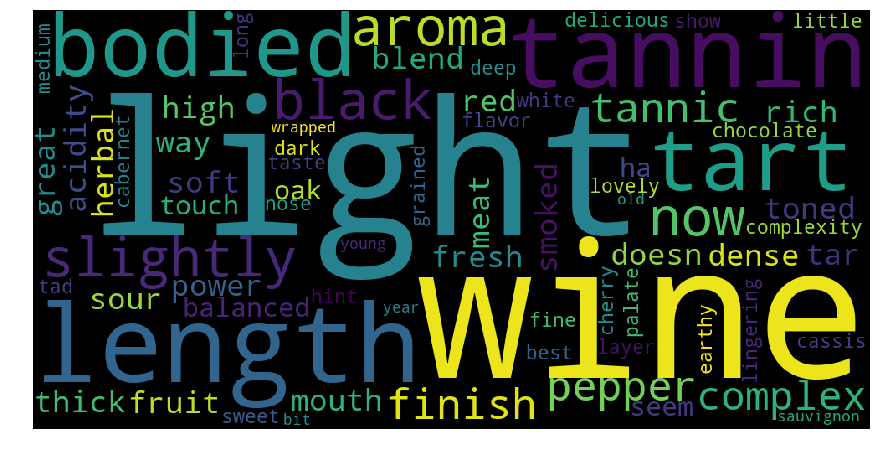

In [227]:
import matplotlib.pyplot as plt

#convert list to string and generate
unique_string=(" ").join(feature_names_1)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()